<a href="https://colab.research.google.com/github/oftto/seoul_house/blob/master/seoulhouse_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
data = pd.read_csv("./gdrive/My Drive/Colab/final_set_seoul_house_200701_201906.csv" , encoding = 'utf-8')

In [4]:
data.head()

,key,접수년도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,건물명,층,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,계약년도,계약일자,건축년도
0,0000000111101010010074000130001360000457,2015,11110,종로구,10100,청운동,74,1,우진빌딩,2,4,다세대/연립,82.69,1,전세,34000,0,2015,20150623,1991
1,0000001111101010010056004130001360000005,2016,11110,종로구,10100,청운동,56,41,MJ하이빌,3,4,다세대/연립,75.00,1,전세,35000,0,2015,20150921,2007
2,0000002111101010010050001030001360000505,2015,11110,종로구,10100,청운동,50,10,글로리아파크,2,4,다세대/연립,79.14,1,전세,38000,0,2015,20150822,2002
3,0000003111101010010052001830001360000637,2015,11110,종로구,10100,청운동,52,18,귀빈하우스,2,4,다세대/연립,102.40,1,전세,43000,0,2015,20150902,2000
4,0000004111101010010052001830001360000129,2018,11110,종로구,10100,청운동,52,18,귀빈하우스,2,4,다세대/연립,102.40,1,전세,43000,0,2015,20150902,2000


In [8]:
for col in data:
    print(col , ':' ,  data[col].unique().size , '/' , data[col].size)

key : 2016400 / 2016400
접수년도 : 10 / 2016400
자치구코드 : 35 / 2016400
자치구명 : 26 / 2016400
법정동코드 : 84 / 2016400
법정동명 : 407 / 2016400
본번 : 1822 / 2016400
부번 : 1330 / 2016400
건물명 : 66330 / 2016400
층 : 73 / 2016400
임대건물코드 : 4 / 2016400
임대건물명 : 4 / 2016400
임대면적 : 17284 / 2016400
전월세구분코드 : 1 / 2016400
전월세구분 : 1 / 2016400
보증금 : 5110 / 2016400
임대료 : 4 / 2016400
계약년도 : 13 / 2016400
계약일자 : 3108 / 2016400
건축년도 : 114 / 2016400


In [0]:
data ['key'] =data['key'].str.slice(0,26)

In [6]:
data.head()

,key,접수년도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,건물명,층,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,계약년도,계약일자,건축년도
0,00000001111010100100740001,2015,11110,종로구,10100,청운동,74,1,우진빌딩,2,4,다세대/연립,82.69,1,전세,34000,0,2015,20150623,1991
1,00000011111010100100560041,2016,11110,종로구,10100,청운동,56,41,MJ하이빌,3,4,다세대/연립,75.00,1,전세,35000,0,2015,20150921,2007
2,00000021111010100100500010,2015,11110,종로구,10100,청운동,50,10,글로리아파크,2,4,다세대/연립,79.14,1,전세,38000,0,2015,20150822,2002
3,00000031111010100100520018,2015,11110,종로구,10100,청운동,52,18,귀빈하우스,2,4,다세대/연립,102.40,1,전세,43000,0,2015,20150902,2000
4,00000041111010100100520018,2018,11110,종로구,10100,청운동,52,18,귀빈하우스,2,4,다세대/연립,102.40,1,전세,43000,0,2015,20150902,2000


In [0]:
new_data = data[['key','접수년도','자치구코드','법정동코드','본번','부번','층','임대건물코드','임대면적','계약년도','계약일자','건축년도','보증금']]

In [46]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016400 entries, 0 to 2016399
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   key     object 
 1   접수년도    int64  
 2   자치구코드   int64  
 3   법정동코드   int64  
 4   본번      int64  
 5   부번      int64  
 6   층       int64  
 7   임대건물코드  int64  
 8   임대면적    float64
 9   계약년도    int64  
 10  계약일자    int64  
 11  건축년도    int64  
 12  보증금     int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 200.0+ MB


In [47]:
na = new_data.isnull()
na_sum = na.sum()
na_sum = na_sum.sort_values(ascending = False)
na_sum

임대면적      25
보증금        0
건축년도       0
계약일자       0
계약년도       0
임대건물코드     0
층          0
부번         0
본번         0
법정동코드      0
자치구코드      0
접수년도       0
key        0
dtype: int64

In [48]:
new_data['임대면적'].fillna(0.0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [49]:
new_data.describe()

,접수년도,자치구코드,법정동코드,본번,부번,층,임대건물코드,임대면적,계약년도,계약일자,건축년도,보증금
count,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06,2.016400e+06
mean,2.014834e+03,1.147186e+04,1.091037e+04,3.663618e+02,1.541225e+01,5.099540e+00,2.244319e+00,6.220868e+01,2.014710e+03,2.014773e+07,1.956499e+03,2.269298e+04
std,2.474897e+00,1.977927e+02,1.186482e+03,4.693712e+02,8.769256e+01,5.743234e+00,1.825809e+00,3.023840e+01,2.470742e+00,2.468818e+04,2.868609e+02,1.853658e+04
min,2.000000e+03,1.111000e+04,1.010000e+04,0.000000e+00,0.000000e+00,-6.000000e+00,1.000000e+00,0.000000e+00,2.007000e+03,2.007013e+07,0.000000e+00,0.000000e+00
25%,2.013000e+03,1.130500e+04,1.020000e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,2.013000e+03,2.013011e+07,1.990000e+03,1.000000e+04
50%,2.015000e+03,1.150000e+04,1.050000e+04,2.010000e+02,0.000000e+00,3.000000e+00,2.000000e+00,5.959000e+01,2.015000e+03,2.015021e+07,1.998000e+03,1.800000e+04
75%,2.017000e+03,1.165000e+04,1.090000e+04,6.090000e+02,4.000000e+00,8.000000e+00,4.000000e+00,8.456000e+01,2.017000e+03,2.017051e+07,2.006000e+03,3.000000e+04
max,2.019000e+03,4.719000e+04,1.870000e+04,6.053000e+03,4.161000e+03,6.800000e+01,9.000000e+00,1.049490e+03,2.019000e+03,2.019062e+07,7.811000e+03,5.541000e+05


In [50]:
new_data.corr()

,접수년도,자치구코드,법정동코드,본번,부번,층,임대건물코드,임대면적,계약년도,계약일자,건축년도,보증금
접수년도,1.000000,0.008234,-0.008358,0.007448,-0.003899,0.010309,0.074923,-0.097084,0.983712,0.984189,0.042789,0.207444
자치구코드,0.008234,1.000000,-0.288679,0.051905,-0.061624,0.054705,0.016292,0.057210,0.010030,0.010159,0.021912,0.174271
법정동코드,-0.008358,-0.288679,1.000000,-0.002203,0.044466,0.000954,0.011507,0.021021,-0.008394,-0.008412,-0.025975,0.004308
본번,0.007448,0.051905,-0.002203,1.000000,-0.004772,0.321061,-0.061723,0.174228,0.012052,0.012166,0.113566,0.236000
부번,-0.003899,-0.061624,0.044466,-0.004772,1.000000,-0.052086,0.148940,-0.055911,-0.002120,-0.002184,0.025551,-0.061915
층,0.010309,0.054705,0.000954,0.321061,-0.052086,1.000000,-0.186796,0.335672,0.015295,0.015558,0.126775,0.494951
임대건물코드,0.074923,0.016292,0.011507,-0.061723,0.148940,-0.186796,1.000000,-0.387398,0.080397,0.080277,0.002054,-0.301918
임대면적,-0.097084,0.057210,0.021021,0.174228,-0.055911,0.335672,-0.387398,1.000000,-0.098572,-0.098382,0.066422,0.666600
계약년도,0.983712,0.010030,-0.008394,0.012052,-0.002120,0.015295,0.080397,-0.098572,1.000000,0.999902,0.044472,0.210271
계약일자,0.984189,0.010159,-0.008412,0.012166,-0.002184,0.015558,0.080277,-0.098382,0.999902,1.000000,0.044540,0.211035


In [13]:
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


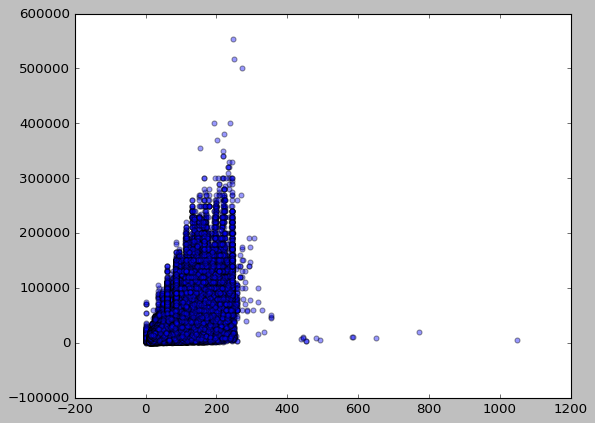

In [51]:
plt.scatter(new_data['임대면적'], new_data['보증금'], alpha=0.4)
plt.show()

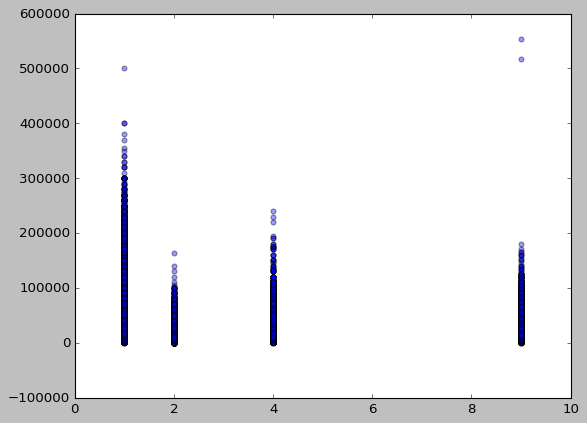

In [52]:
plt.scatter(new_data['임대건물코드'], new_data['보증금'], alpha=0.4)
plt.show()

In [0]:
# 다중선형회귀모델
#http://hleecaster.com/ml-multiple-linear-regression-example/


In [0]:
from sklearn.model_selection import train_test_split
x = new_data.iloc[:,1:-1]
y = new_data['보증금'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predicted = mlr.predict(x_test)

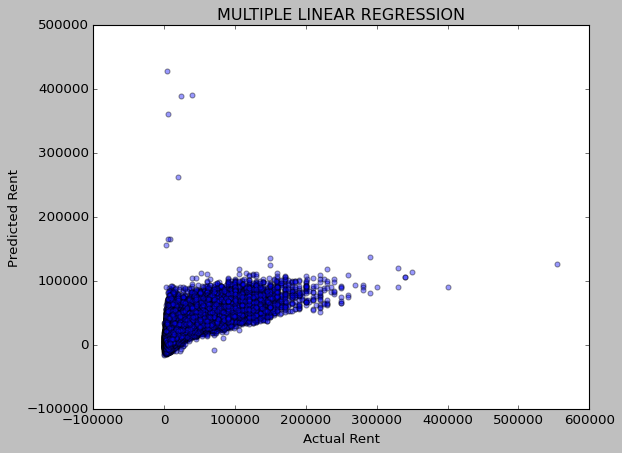

In [56]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predicted, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [57]:
((y_test - y_predicted) ** 2).sum()


52896063836018.78

In [58]:
((y_test - y.mean()) ** 2).sum()

137440096449474.36

In [59]:
print(mlr.score(x_train, y_train))

0.618380638492367
